# Dipole Radiation

Any accelerating charge produces electromagnetic radiation.  If the charges in a neutral object — like an atom or a radio antenna — are undergoing periodic motion, we can approximate the system as an **oscillating electric dipole**.  As discussed in Chapter 9 of _CER_ or [Chapter 28 of the Feynman Lectures](https://www.feynmanlectures.caltech.edu/I_28.html), the __radiation field__ at point $\vec{r}$ in the $xz$-plane far from a dipole oscillating along the $z$-axis at the origin is

$$\vec{E}(\vec{r}, t) = \dfrac{1}{c^2}
\, \omega^2 p_0 \sin \theta
\, \dfrac{\cos \omega(t - r/c)}{r}
\, (\hat{e}_x \cos \theta - \hat{e}_z \sin \theta)$$

The goal of this exercise is to tame this expression and create a movie of an oscillating electric field.

First, the variables:

| Symbol | Meaning |
| --- | --- |
| $\omega$ | angular frequency of oscillation |
| $p_0$ | maximum dipole moment |
| $c$ | speed of light |
| $r$ | distance from origin to point of interest |
| $t$ | current time |
| $\theta$ | angle from $y$-axis to point of interest |

The final term in parentheses is a unit vector that gives the direction of the field.

### Warm Up

Our goal is to watch the electromagnetic waves propagate outward from the dipole as it oscillates.  This means we need to choose the time increments and spatial grid of points appropriately.  We need to ...

- Determine the duration of the simulation if we want to watch 10 complete cycles of oscillation.

- Determine the size of the grid if we want to see at least 5 wavelengths in each direction.

- Determine a reasonable time increment `dt` and grid spacing `dx` for simulating red light with a wavelength of $700 \ {\tt nm}$.

We do not have the computer hardware of lifespan to simulate a 1 billion by 1 billion grid of points for 10 billion time steps!

___Solution:___

- The wavelength of the light is $\lambda = 7.0 \, 10^{-7} \ {\tt m}$.

- The period of a wave is $T = \dfrac{1}{f} = \dfrac{\lambda}{c}$.  For red light, this works out to $T \approx 2.335 \cdot 10^{-15} \ {\tt s}$.

___Dimensional Analysis:___

These values are very small, and the frequency and speed of light are very large. We might run into roundoff error if we are not careful.  Instead, let's choose our units so that numerical values are on the order of 1.

First, note that we can rewrite the argument of the cosine function as follows:
$$\omega(t - R/c) = 2\pi \left(\dfrac{t}{T} - \dfrac{r}{\lambda}\right)$$
If we measure time in femtoseconds and distance in micrometers, all numbers in this expression will be of order 1.

Second, we can now rewrite the expression for the electric field as follows:
$$\vec{E}(\vec{r}, t)
= E_0 \, \dfrac{\lambda}{r} \, \cos 2\pi \left( \dfrac{t}{T} - \dfrac{r}{\lambda}\right)
\, (\hat{e}_x \cos \theta - \hat{e}_z \sin \theta)  \sin \theta
$$
where
$$E_0 = \dfrac{\omega^2 p_0}{\lambda c^2} = 4 \pi^2 \dfrac{p_0}{\lambda^3}$$

Different values of $E_0$ change the overall magnitude of the electric field, but not the relative size of the components at different points.  Thus, we can set $E_0 = 1$ during the calculation, and we can restore the units if we need to compute forces at another time.

This type of dimensional analysis can greatly simplify codiing and often leads to more accurate results because you do not "forget" a factor $10^9$ somewhere in the code.

Now, let's make a movie!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import system
from IPython.display import HTML, clear_output

## Linear Dipole

Our first simulation will illustrate the radiation field of a dipole oscillating along the z-axis.  This is much like the field created by a single radio tower.  Before you run the following cells, make some predictions.

- What do you expect the field to look like?
- In what directions will the strength of the field be strongest? Weakest?

***Write your predictions below.***

- I expect there to be a periodic pattern to the fields
- I expect fields to be strongest at the antinodes because that is where there is the greatest accelleration 

In [2]:
from scipy.constants import c as speed_of_light

# Wavelength in m.
lambda0 = 700e-9

# Wavelength in um.
wavelength = lambda0 * 1e6

# Period in fs.
period = 1e15 * lambda0 / speed_of_light

# Define grid of points and array of times for plotting.
t_max = period
dt = period / 64
t_values = np.arange(0, t_max + dt, dt)
N = len(t_values)

x_max = 3 * wavelength
dx = wavelength / 10
coordinates = np.arange(-x_max, x_max + dx, dx)

X,Z = np.meshgrid(coordinates, coordinates)
R = np.sqrt(X**2 + Z**2 + 1e-6)
theta = np.arctan2(X,Z)

# Define field strength and cutoff for rescaling large values.
E0 = 2.0
E_cut = 1.0
R_cut = 0.5*wavelength

# Remove any existing movie frames.
system('rm -f *-linear-dipole.jpg')

# It is essential that the frames be named in alphabetical order.
# {:03d} will display integers with three digits and insert zeros if needed:
# '000_movie.jpg', '001_movie.jpg', etc.
file_name = "{:03d}-linear-dipole.jpg"


plt.figure(figsize=(6,6), dpi=200)
# Generate frames and save each figure as a separate .jpg file.
for i, t in enumerate(t_values):
    # Compute magnitude of field.
    ## Dipole oscillating along z-axis.
    # pz = np.cos(2*np.pi * (t/period))
    # px = 0
    # E =  -E0 * wavelength * np.sin(theta) * np.cos(2*np.pi * (t/period - R/wavelength)) / R
    
    ## Dipole oscillating along x-axis.
    pz = 0
    px = np.cos(2*np.pi * (t/period))    
    E =  E0 * wavelength * np.cos(theta) * np.cos(2*np.pi * (t/period - R/wavelength)) / R

    # Use this for the oscillating dipole.
    Ex = E * np.cos(theta)
    Ez = -E * np.sin(theta)

    # Rescale large values.
    Ex[R<R_cut] = 0
    Ez[R<R_cut] = 0
    E = np.sqrt(Ex**2 + Ez**2) 
    bad = E > E_cut
    Ex[bad] = E_cut * Ex[bad] / E[bad]
    Ez[bad] = E_cut * Ez[bad] / E[bad]
    
    # Make plot and save to file.
    plt.quiver(X, Z, Ex, Ez, pivot='middle', lw=1, scale=40)
    plt.quiver(0,0,px,pz, pivot='middle', color='red', lw=1, scale=10)
    plt.xlabel('X [um]')
    plt.ylabel('Z [um]')
    plt.savefig(file_name.format(i))  # save current plot

    # Clear plot for next frame.
    plt.cla()
    
    print("Completed frame %d of %d.\r" % (i+1,N), end='')

plt.close()

In [3]:
!ffmpeg -y -i %03d-linear-dipole.jpg -pix_fmt yuv420p linear-movie.mp4

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libmfx --enable-amf --enable-ffnvcodec --enable-cuvid --enable-d3d11va --enable-nvenc --enable-nvdec --enable-dxva2 --enable-avisynth --enable-libopenmpt
  libavutil 

In [4]:
# Play the movie within the notebook.
HTML("""
    <video width="800" height="800" alt="test" controls loop>
        <source src=%s type="video/mp4">
    </video>
""" % "linear-movie.mp4")

### Questions

Describe the field pattern.

- What does the field to look like?
- In what directions will the strength of the field be strongest? Weakest?

***Report your observations below.***

the field is radiating out in pulses; Each pulse happens when the dipole changes direction (mins and max of the oscilations) then decreases until the next pulse. Though there is no direction that the field is largest.

Would you describe this radiation as a "plane wave"?  Why or why not?

***Share your opinion below.***

I think so, because the source is planar. However, the fields do change direction, and I'm not sure how to tell if the phase is constant, so I'm not sure

**Different Axis**

How would you expect the pattern to change if you rotated the dipole by 90°?

***Report your prediction below.***

I don't think the pattern would change at all because the acceleration and oscilation shouldn't change

The code above contains instructions for viewing a dipole oscillating along the x-axis.

Comment out the three lines below
```
    ## Dipole oscillating along z-axis.
```
Uncomment the three lines below
```
    ## Dipole oscillating along x-axis.
```
Rerun the simulation.

- Describe what you see.
- Assess your predictions.

***Report your observations below.***

The periodicity and magnitudes, and way the fields change direction all stayed the same, but rotated by 90 degrees. before, the radiation was outward, but the initial pulse of rad was 0 at the tip of the arrow. So by the time it's a small distance away, the radiation goes out pepedicular to the direction of the dipole.

## Rotating Dipole

Instead of a single dipole oscillating along the $y$-axis, analyze a dipole that is rotating in the $xy$-plane.  The dipole moment is

$$\vec{p}(t) = p_0 \left(\hat{e}_x \cos \omega t + \hat{e}_z \sin \omega t \right)$$

This is equivalent to two _linear_ dipoles at right angles to each other, oscillating $90^\circ$ out of phase.

The code below simply adds together the fields of the two dipoles you just observed.  Before you run it, make some predictions.

- What do you expect the field to look like?
- In what directions will the strength of the field be strongest? Weakest?

***Write your predictions below.***

I expect the magnitude of raditaion to be smaller with less obvious pulses because the waves will superimpose and cancel each other out

TypeError: quiver() takes 2-5 positional arguments but 6 were given

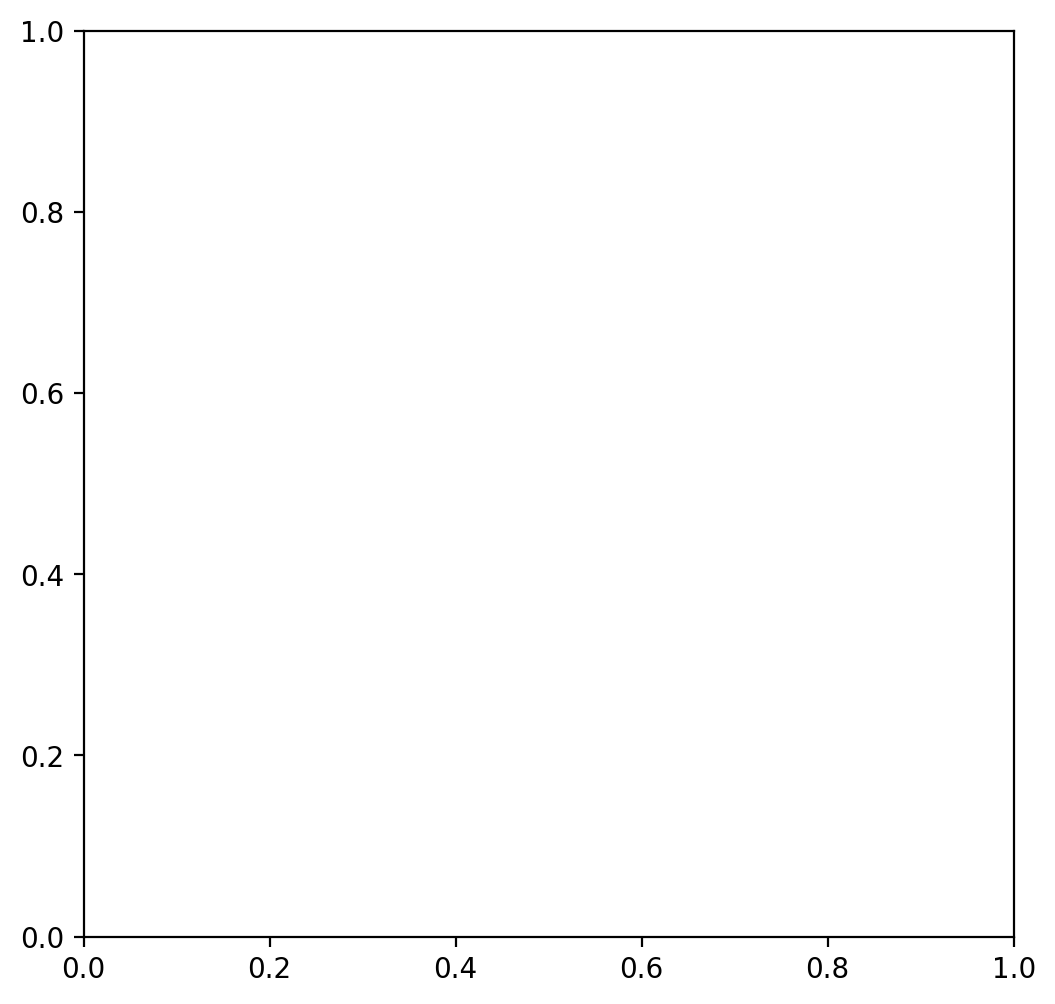

In [20]:
from scipy.constants import c as speed_of_light

# Wavelength in m.
lambda0 = 700e-9

# Wavelength in um.
wavelength = lambda0 * 1e6

# Period in fs.
period = 1e15 * lambda0 / speed_of_light

# Define grid of points and array of times for plotting.
t_max = period
dt = period / 64
t_values = np.arange(0, t_max + dt, dt)
N = len(t_values)

x_max = 3 * wavelength
dx = wavelength / 10
coordinates = np.arange(-x_max, x_max + dx, dx)

X,Y,Z = np.meshgrid(coordinates, coordinates, coordinates)
R = np.sqrt(X**2 + Y**2 + Z**2 + 1e-6)
theta = np.arctan2(X,Y,Z)

# Define field strength and cutoff for rescaling large values.
E0 = 2.0
E_cut = 1.0
R_cut = 0.5*wavelength

# Remove any existing movie frames.
system('rm -f *-rotating-dipole.jpg')

# It is essential that the frames be named in alphabetical order.
# {:03d} will display integers with three digits and insert zeros if needed:
# '000_movie.jpg', '001_movie.jpg', etc.
file_name = "{:03d}-rotating-dipole.jpg"


plt.figure(figsize=(6,6), dpi=200)
# Generate frames and save each figure as a separate .jpg file.
for i, t in enumerate(t_values):
    # Plot the dipole that is creating the fields.
    pz = -np.cos(2*np.pi * (t/period))
    px = -np.sin(2*np.pi * (t/period))
    py = -np.cos(2*np.pi * (t/period))

    # Compute magnitudes of fields.
    E1 = E0 * wavelength * np.sin(theta) * np.cos(2*np.pi * (t/period - R/wavelength)) / R
    E2 = -E0 * wavelength * np.cos(theta) * np.sin(2*np.pi * (t/period - R/wavelength)) / R

    Ex = (E1 + E2) * np.cos(theta)
    Ez = -(E1 + E2) * np.sin(theta)
    Ey = (E1 + E2) * np.cos(theta)

    # Rescale large values.
    Ex[R<R_cut] = 0
    Ez[R<R_cut] = 0
    Ey[R<R_cut] = 0
    E = np.sqrt(Ex**2 + Ez**2) 
    bad = E > E_cut
    Ex[bad] = E_cut * Ex[bad] / E[bad]
    Ez[bad] = E_cut * Ez[bad] / E[bad]
    Ey[bad] = E_cut * Ex[bad] / E[bad]

    # Make plot and save to file.
    plt.quiver(X, Y, Z, Ex, Ey, Ez, pivot='middle', lw=1, scale=40)
    plt.quiver(0,0,px,pz, pivot='middle', color='red', lw=1, scale=10)
    plt.xlabel('X [um]')
    plt.ylabel('Z [um]')
    plt.savefig(file_name.format(i))  # save current plot

    # Clear plot for next frame.
    plt.cla()
    
    print("Completed frame %d of %d.\r" % (i+1,N), end='')

plt.close()


In [13]:
!ffmpeg -y -i %03d-rotating-dipole.jpg -pix_fmt yuv420p rotating-movie.mp4

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libmfx --enable-amf --enable-ffnvcodec --enable-cuvid --enable-d3d11va --enable-nvenc --enable-nvdec --enable-dxva2 --enable-avisynth --enable-libopenmpt
  libavutil 

In [14]:
# Play the movie within the notebook.
HTML("""
    <video width="800" height="800" alt="test" controls loop>
        <source src=%s type="video/mp4">
    </video>
""" % "rotating-movie.mp4")

### Questions

Describe the field pattern.

- What does the field to look like?
- In what directions will the strength of the field be strongest? Weakest?

***Report your observations below.***

The field is spiraling outward from the spinning arrow. The field strength appears to decrease with distance. The spiral is caused by the fact that when the arrow is rotating, any where the point poitns at changes field direction, so each spiral around changes direction

Would you describe this radiation as a "plane wave"?  Why or why not?

***Share your opinion below.***

I think not because the phase is not constant

Modify the code above to make the dipole rotate in the opposite direction ***and*** produce the correct radiation pattern.

**Hint:** It only requires two minus signs ...

- Describe your attempts and your results.
- Why are only two minus signs required?

***Report your observations below.***

- I removed the minus signs before tehe sin/cos of the dipole equations. Kinda bummed this didn't work.
- I changed the signs for the magnitude of E, but I don't expect that to work... This made the whole movie disappear. It's very weird because I tried this multiple times, and each time it broke the movie and to fix it I had to delete the whole cell of code and paste the origical in. Just changing the lines back didn't work. Very weird!
- New Idea: change minus sign of only one half of the dipole (one of the two equations): This worked! I'm thinking this is because I had to change the way it moved around one exis, not boht, because changing signs in both would still have the same end result when superimposed. My first thought was in the dipole equations, so I'm counting this as getting it first try:)
- Idea: add minus signs inside parenthesis. Based on the previous results, I tried this in only one of the equations, expecting the same results because it's the same overall sign, but thatbroke the move again. Weird


What would happen if the dipole along the x-axis were **half as large** as the dipole along the z-axis?

- How do you think this would change the field pattern?  Why?

***Report your predictions below.***

I think the magnitude will decrease and the frequency will increase. The smaller mass will make the energy release smaller (mass = energy) and the smaller size would also cause a closer orbit (not sure about the second part though). 
I also think the patterns will change because the movement of the dipole will no longer be a perfect circle.

Modify the code above so that the dipole along the  x-axis is **half as large** as that along the z-axis.  You will need to modify `px` and `E2`.

- How does this change the field pattern?

***Report your observations below.***

The rotation of the arrow changed as I expected. It's rotating at the same speed, but it an ellipsoid orbit rather than a circle. This doesn't seem to affect the radiation though. Then I realized I actually changed E1 and pz instead of E2 and px, but this was very similar because the effect was the same, excepts when x was smaller, the arrow got smaller vertically, and when I changed x, the arrow got smaller horizontally.

# Reflection and Summary

- What are the major takeaways of this assignment for you?
 - This is the most I've felt like I understood enough to learn a lot because I have more of a background and electrons and dipoles are way more familiar to me than fields. I was able to see the obviously connected radiation as a direct result of the acceleration of the electron. Being able to view the effect of accelleration in terms of direction *and* velocity was a big takeaway for me. As well as how the action affected direction of the field. I hope my laptop calms down and I can do the last part of the rotating dipole, because I'm excited to see the effect of helf-size along only one axis.
- What was the most difficult part of this assignment?
 - Just my movie not coperating! And at the beginning, I struggled with what we were defining. I think I was wanting to answer the questions about the sin wave of the dipole, rather than of the periodicity of the radiation. I'm pretty sure I figuerd that out, but I still don't fully understand what makes a plane wave.
- What was the most interesting part of this assignment?
 - All of it? Also, the rotiational way the direction of the dipole around x, y changed. I didn't expect that and it was harder for me to figure out.
- What questions do you have?
 - What makes a plane wave special? I think I've been missing that piece of understanding. 
 - Is there a way to actually plot the movement of the rotational dipole?

***Include your response below.***

# Challenge Problems

The challenge problems below ask you to extend the simulation above.  


## 3D Plots

Adapt the code to plot the field of a linear dipole or a rotating dipole in three dimensions.


I tried making the plot 3D (that's why it looks broken now). I thought to add a Y anywhere I saw X,Z. This didn't work. I think adding another dipole and another E value was on the right track, but I couldn't create a grid or quizer plot with the third axis 

## A note on coordinates and formulae

The simulation above uses spherical coordinates to match equations in textbooks.  However, this is not always convenient for simulating problems on a grid.  For instance, the equations for the fields assume the dipoles are at the origin.  If there are two dipoles at different locations, "$\hat{e}_r$" and "$\hat{e}_\theta$" in the formulas are ***not*** the same vector for both dipoles.

It might be easier to work in Cartesian coordinates.  The following relations may be useful if you attempt the challenge problems. If the location of the dipole is $(x_0, y_0, z_0)$, then the textbook formulae translate as follows.

\begin{align*}
r &= \sqrt{(x-x_0)^2 + (y-y_0)^2 + (z-z_0)^2} \\
\cos \theta & = \dfrac{z-z_0}{r} \\
\sin \theta &= \dfrac{\sqrt{(x-x_0)^2 + (y-y_0)^2}}{r} \\
\cos \phi &= \dfrac{x-x_0}{\sqrt{(x-x_0)^2+(y-y_0)^2}} \\
\sin \phi &= \dfrac{y-y_0}{\sqrt{(x-x_0)^2+(y-y_0)^2}} \\
\hat{e}_r &= \hat{e}_x \, \sin \theta \cos \phi + \hat{e}_y \, \sin \theta \sin \phi + \hat{e}_z \, \cos \theta \\
\hat{e}_\theta &= \hat{e}_x \, \cos \theta \cos \phi + \hat{e}_y \, \cos \theta \sin \phi - \hat{e}_z \sin \theta \\
\hat{e}_\phi &= -\hat{e}_x \, \sin \phi + \hat{e}_y \, \cos \phi
\end{align*}